In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import csv

In [3]:
data = pd.read_csv("../dummy_evaluation/data/devnagri_train.csv")


In [4]:
data = data.values


In [5]:
data[0]

array([40,  0,  0, ...,  0,  0,  0])

In [6]:
l = []
for x in data:
    n = np.ndarray((32,32), np.uint8)
    for i in range(32):
        for j in range(32):
            n[i, j] = x[i*32+j+1]
    l.append(n)

In [7]:
l[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
from skimage.filters import gabor
from skimage import data, io

In [9]:
filt_real, filt_imag = gabor(l[0], frequency=0.9)

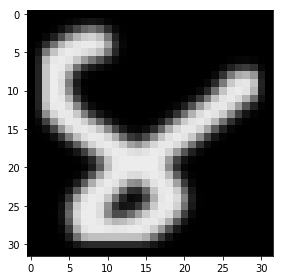

In [10]:
plt.figure()
io.imshow(filt_real)
io.show()

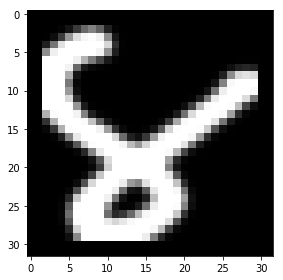

In [11]:
plt.figure()
io.imshow(l[0])
io.show()

In [12]:
from skimage.feature import hog
from skimage import data, exposure


/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


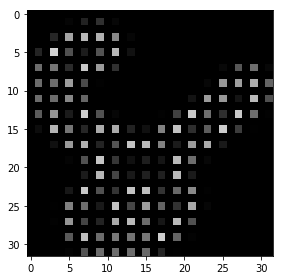

In [13]:
fd, hog_image = hog(l[0], orientations=8, pixels_per_cell=(2, 2), cells_per_block=(1, 1), visualize=True, multichannel=False)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 300))

plt.figure()
io.imshow(hog_image_rescaled)
io.show()

In [14]:

from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage.util import random_noise

sigma = 0.12

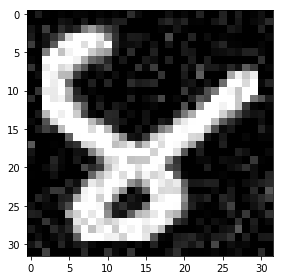

In [15]:
noisy = random_noise(l[0], var=sigma**2)
plt.figure()
io.imshow(noisy)
io.show()

In [16]:
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)

In [17]:
sigma_est

0.1015071553837329

In [18]:
im_bayes = denoise_wavelet(noisy, multichannel=False, convert2ycbcr=True,
                           method='BayesShrink', mode='soft')
im_visushrink = denoise_wavelet(noisy, multichannel=False, convert2ycbcr=True,
                                method='VisuShrink', mode='soft',
                                sigma=sigma_est)
im_visushrink2 = denoise_wavelet(noisy, multichannel=False, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/2)
im_visushrink4 = denoise_wavelet(noisy, multichannel=False, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/4)


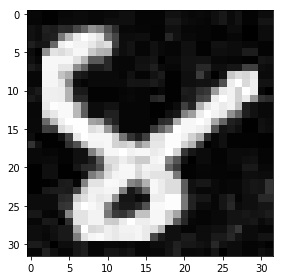

In [19]:
plt.figure()
io.imshow(im_bayes)
io.show()

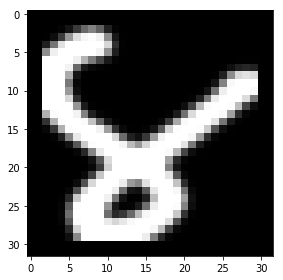

In [20]:
plt.figure()
io.imshow(l[0])
io.show()

In [21]:
noisy = l[0]
im_bayes = denoise_wavelet(noisy, multichannel=False, convert2ycbcr=True,
                           method='BayesShrink', mode='soft')
im_visushrink = denoise_wavelet(noisy, multichannel=False, convert2ycbcr=True,
                                method='VisuShrink', mode='soft',
                                sigma=sigma_est)
im_visushrink2 = denoise_wavelet(noisy, multichannel=False, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/2)
im_visushrink4 = denoise_wavelet(noisy, multichannel=False, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/4)


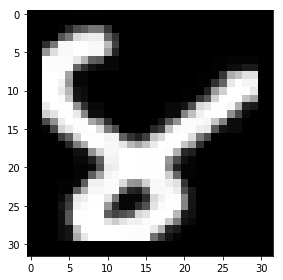

In [22]:
plt.figure()
io.imshow(im_bayes)
io.show()


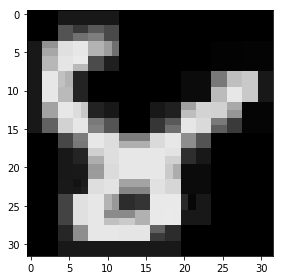

In [23]:
plt.figure()
io.imshow(im_visushrink)
io.show()

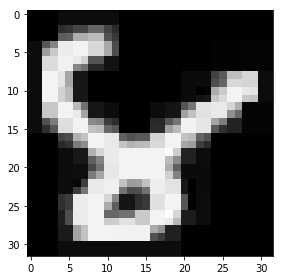

In [24]:
plt.figure()
io.imshow(im_visushrink2)
io.show()

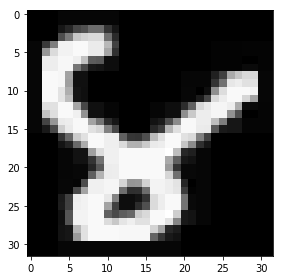

In [25]:
plt.figure()
io.imshow(im_visushrink4)
io.show()

In [26]:
np.fft.fft2(noisy, s=None, axes=(-2, -1), norm=None)

array([[ 69351.            +0.j        , -13195.65876203-20355.44732263j,
         -8744.83187831 -5283.21294597j, ...,
         -9580.30075941 -4850.64538072j,  -8744.83187831 +5283.21294597j,
        -13195.65876203+20355.44732263j],
       [-16812.90479687 +5946.74138672j,  13563.48922768-27777.0906684j ,
         -7736.97721126 +9552.38421994j, ...,
          8676.27549353 +2463.9743093j ,   8475.46116919 +3997.25284175j,
         -2072.97031534-18641.39117835j],
       [ -5147.32063843 +5061.8994186j , -11402.68518606 +7427.9826277j ,
           664.47880012 -5184.27530468j, ...,
          2798.67210372 -3004.74140828j,  -5296.57695581 -4007.58883269j,
          1697.67048042 +3605.59814472j],
       ...,
       [-10389.80810192 +2218.71195699j,   3785.21085484+12759.86175345j,
         13624.15530423 -2130.65803762j, ...,
          4878.15189473 +7717.48467544j,  -5891.45885481-14562.837511j  ,
          6559.04266974 -7944.6365039j ],
       [ -5147.32063843 -5061.8994186j ,   1

In [27]:
from scipy.fftpack import dct

In [28]:
y = dct(noisy)

In [29]:
y

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.02000000e+02,  6.17544580e+02, -4.05759806e+01, ...,
         3.99409264e+00, -1.87566820e+00, -3.13002197e+00],
       ...,
       [ 5.20200000e+03,  2.11476039e+03, -2.76228326e+03, ...,
         3.74249861e+01, -2.12521201e+01, -5.25423183e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])